# Creating a Book Recommendation System In Python

In [1]:
#importing the relevant packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Getting an overview of the data

In [2]:
books = pd.read_csv("books.csv")
books.head()

C:\Users\Temi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [3]:
users = pd.read_csv("Users.csv")
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [6]:
ratings = pd.read_csv("Ratings.csv")
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
print (books.shape)
print (ratings.shape)
print (users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


## Data Cleaning

### Books table. 

In [8]:
print(books.describe())

              ISBN      Book-Title      Book-Author  Year-Of-Publication  \
count       271360          271360           271359               271360   
unique      271360          242135           102023                  202   
top     0385295847  Selected Poems  Agatha Christie                 2002   
freq             1              27              632                13903   

        Publisher                                        Image-URL-S  \
count      271358                                             271360   
unique      16807                                             271044   
top     Harlequin  http://images.amazon.com/images/P/006097401X.0...   
freq         7535                                                  2   

                                              Image-URL-M  \
count                                              271360   
unique                                             271044   
top     http://images.amazon.com/images/P/044021145X.0...   
freq          

In [9]:
#removing columns that arent needed for the analysis
books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'],axis=1,inplace=True)

In [10]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


From the data source it was discovered that some of the entries have year of publication in the authors column and the publisher in the year of publivation column.

In [11]:
#finding all the years that are not integers. This applies to three books. They can be identified with their ISBNs;
#078946697X, 2070426769  and 0789466953  
non_integer_years = books[pd.to_numeric(books['Year-Of-Publication'], errors='coerce').isna()]
print(non_integer_years)

              ISBN                                         Book-Title  \
209538  078946697X  DK Readers: Creating the X-Men, How It All Beg...   
220731  2070426769  Peuple du ciel, suivi de 'Les Bergers\";Jean-M...   
221678  0789466953  DK Readers: Creating the X-Men, How Comic Book...   

       Book-Author Year-Of-Publication  \
209538        2000   DK Publishing Inc   
220731        2003           Gallimard   
221678        2000   DK Publishing Inc   

                                                Publisher  
209538  http://images.amazon.com/images/P/078946697X.0...  
220731  http://images.amazon.com/images/P/2070426769.0...  
221678  http://images.amazon.com/images/P/0789466953.0...  


In [12]:
#On closer inspection, the Year-Of-Publication is in the Book-Author section and the Publisher is in the Year-Of-Publication section. 
non_integer_years.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [13]:
#making the required changes
books.at[non_integer_years.index[0], 'Year-Of-Publication'] = 2000
books.at[non_integer_years.index[0], 'Book-Author'] = "Michael Teitelbaum"
books.at[non_integer_years.index[0], 'Publisher'] = "DK Publishing Inc" 
books.at[non_integer_years.index[0], 'Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

books.at[non_integer_years.index[1], 'Year-Of-Publication'] = 2003
books.at[non_integer_years.index[1], 'Book-Author'] = "Jean-Marie Gustave Le ClÃ?Â©zio"
books.at[non_integer_years.index[1], 'Publisher'] = "Gallimard" 
books.at[non_integer_years.index[1], 'Book-Title'] = "Peuple du ciel, suivi de 'Les Bergers"


books.at[non_integer_years.index[2], 'Year-Of-Publication'] = 2000
books.at[non_integer_years.index[2], 'Book-Author'] = "James Buckley"
books.at[non_integer_years.index[2], 'Publisher'] = "DK Publishing Inc" 
books.at[non_integer_years.index[2], 'Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [14]:
#checking to see if those changes have been registered. 
books.loc[(books.ISBN == '0789466953') | (books.ISBN == '078946697X') | (books.ISBN == '2070426769'), :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc


In [15]:
#turning all the years in the Year-of-Publication column into numbers
books['Year-Of-Publication']=pd.to_numeric(books['Year-Of-Publication'], errors='coerce')
print (sorted(books['Year-Of-Publication'].unique()))

[0, 1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In the list above it can still be noticed that some publication years are 0 which is impossible. 
And some are >2004 which is also impossible since the dataset was created in 2004.

In [16]:
#list of entries with invalid publication years
books[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2004)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH"
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV)
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri
...,...,...,...,...,...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square
271000,0743490258,Best of Friends,Cathy Kelly,2005,Downtown Press
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates


I could either choose to delete all these entries or I could delete their years and replace with the average year of publication. 
A third option is using google to replace each year individually, however this is not feasible. 
I'd rather replace with the average years of publication than to delete 4690 entries. 
Especially since the publication year is not necessary for our eventual recommendation model.

In [17]:
#changing any invalid publication year to the mean publication year
books.loc[(books['Year-Of-Publication'] == 0) | (books['Year-Of-Publication'] > 2004), 'Year-Of-Publication'] = books['Year-Of-Publication'].mean()

In [18]:
#checking to see if this has taken effect. 
print (sorted(books['Year-Of-Publication'].unique()))

[1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1959.7612728478773, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0]


In [19]:
#the change took effect but it also turned all my years into floats. This code will turn them back into integers. 
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [20]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication     int32
Publisher              object
dtype: object

In [21]:
#checking to see if there are any null values in the columns. The count() only counts non null values.
books.count()

ISBN                   271360
Book-Title             271360
Book-Author            271359
Year-Of-Publication    271360
Publisher              271358
dtype: int64

In [22]:
#The Book-Author column is missing one entry while the Publisher column is missing two entries.
#the following code shows us those rows
books.loc[(books['Publisher'].isnull()) | (books['Book-Author'].isnull())]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [23]:
#because the missing values are very few, a google search can be used to correct them. 
books.loc[books["ISBN"] == "193169656X", "Publisher"] = "Mundania Press LLC"
books.loc[books["ISBN"] == "1931696993", "Publisher"] = "Bantam; Reprint edition"
books.loc[books["ISBN"] == "9627982032", "Book-Author"] = "Larissa Anne Downes"

In [24]:
#count to see that all changes have been applied and there are no longer any null values.
books.count()

ISBN                   271360
Book-Title             271360
Book-Author            271360
Year-Of-Publication    271360
Publisher              271360
dtype: int64

### Users table.

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [28]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [29]:
#finding the oldest and younest persons that rated books
print (users["Age"].max())
print (users["Age"].min())

244.0
0.0


The Age column will likely need some work. 244 years old is the max age, but this is impossible.
Its also highly unlikely that anyone below the age of 7 is rating books.
I could delete these entries, but I'd rather keep them. 
I will assume an arbitrary threshold of between 7 and 75 for the ages. 
All ages that don't fit into this bracket will first be made null and then assigned the average age in the dataset.

In [30]:
users.loc[(users["Age"] < 7) | (users["Age"] > 75), "Age"] = np.nan
#replacing all the null ages with the average age in the users table and turning them to integers
users['Age'].fillna(users["Age"].mean(), inplace=True)
users["Age"]=users["Age"].astype(int)

In [31]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",34
1,2,"stockton, california, usa",18
2,3,"moscow, yukon territory, russia",34
3,4,"porto, v.n.gaia, portugal",17
4,5,"farnborough, hants, united kingdom",34


### Ratings table.

In [32]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [33]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


The ratings table seems to be in good shape and does not necessarily need any data cleaning. However, it needs to be changed for the recommendation system. 
The ratings table should ideally only contain books that are in the books table (using the ISBN as the primary key to identify them) and Users that are in the user table (using User-ID as the primary ker to identify them). This new ratings table will be called "ratings1". ratings1 will be used to create the recommendation system. 

In [99]:
ratings1 = ratings[ratings['User-ID'].isin(users['User-ID'])]
ratings1 = ratings[ratings["ISBN"].isin(books["ISBN"])]

In [100]:
#notice the difference in size after making the adjustment
ratings.shape, ratings1.shape

((1149780, 3), (1031136, 3))

## Analysis 

In [39]:
#bar of the publishers
#bar of authors
#box plot of ages
#bar of ratings

<AxesSubplot:xlabel='Book-Rating', ylabel='count'>

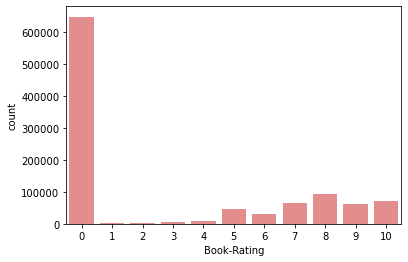

In [36]:
sns.countplot(x="Book-Rating", data=ratings1, color = "lightcoral")

So many zero ratings does not tell us enough about the behaviour of the users in the dataset. It could be helpful to remove zero. 

In [37]:
non_zero_ratings = ratings1[ratings1['Book-Rating'] != 0]

Text(0.5, 1.0, 'Non zero ratings')

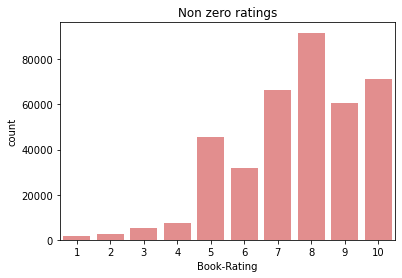

In [38]:
sns.countplot(x="Book-Rating", data=non_zero_ratings, color="lightcoral")
plt.title("Non zero ratings")

C:\Users\Temi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age distribution of users')

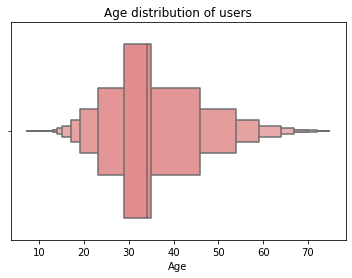

In [39]:
sns.boxenplot(users["Age"], color="lightcoral")
plt.title ("Age distribution of users")

In [40]:
#for the authors featured the most in the books dataset
author_count = books["Book-Author"].value_counts()
author_count_sorted = author_count.sort_values(ascending=False)
#selecting the top 10 categories                                               
top_10_authors = author_count_sorted[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Agatha Christie'),
  Text(1, 0, 'William Shakespeare'),
  Text(2, 0, 'Stephen King'),
  Text(3, 0, 'Ann M. Martin'),
  Text(4, 0, 'Carolyn Keene'),
  Text(5, 0, 'Francine Pascal'),
  Text(6, 0, 'Isaac Asimov'),
  Text(7, 0, 'Nora Roberts'),
  Text(8, 0, 'Barbara Cartland'),
  Text(9, 0, 'Charles Dickens')])

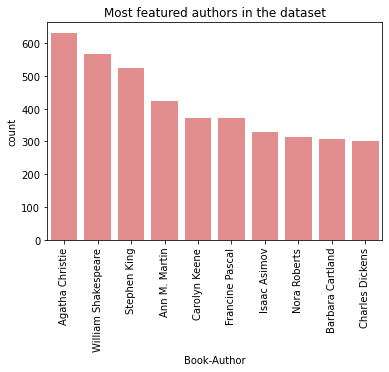

In [38]:
sns.countplot(x="Book-Author", data=books, order=top_10_authors.index, color="lightcoral")
plt.title ("Most featured authors in the dataset")
plt.xticks(rotation=90)

In [41]:
publisher_count = books["Publisher"].value_counts()
publisher_count_sorted = publisher_count.sort_values(ascending=False)
#selecting the top 10 categories                                               
top_10_publishers = publisher_count_sorted[:10]

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Harlequin'),
  Text(1, 0, 'Silhouette'),
  Text(2, 0, 'Pocket'),
  Text(3, 0, 'Ballantine Books'),
  Text(4, 0, 'Bantam Books'),
  Text(5, 0, 'Scholastic'),
  Text(6, 0, 'Simon &amp; Schuster'),
  Text(7, 0, 'Penguin Books'),
  Text(8, 0, 'Berkley Publishing Group'),
  Text(9, 0, 'Warner Books')])

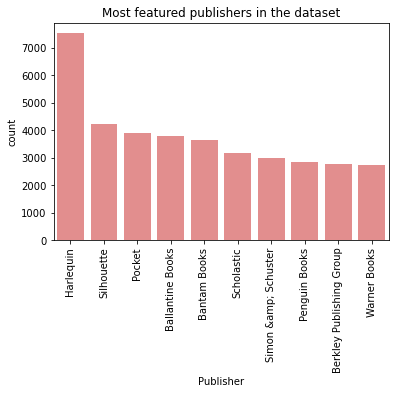

In [42]:
sns.countplot(x="Publisher", data=books, order=top_10_publishers.index, color="lightcoral")
plt.title ("Most featured publishers in the dataset")
plt.xticks(rotation=90)

In [124]:
ratings1.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


## Transformation

Before, I can start with my recommendation system, I'd like to transform my data in two ways. First its by creating a new ratings table that only includes ratings that are not zero.

In [125]:
ratings2 = ratings1[ratings1['Book-Rating'] != 0]

In [153]:
ratings2.head()

,User-ID,ISBN,Book-Rating
0,276726,0155061224,5
1,276729,052165615X,3
2,276729,0521795028,6
3,276744,038550120X,7
4,276747,0060517794,9


In [139]:
ratings2.shape


(383842, 3)

In [140]:
# Because of size and processing issues, I decided to create with a random sample of the ratings2 DataFrame called ratings3
ratings3 = ratings2.sample(n=1000, random_state=42)  # Sample 1000 rows

# Display the shape of the new sample
print(ratings3.shape)


(1000, 3)


## Recommendation System with Nearest Neighbour

In [146]:
# Creating the user-item matrix
user_item_matrix = ratings3.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)

# Display the user-item matrix
print(user_item_matrix.head())


ISBN     0002553384  0002555298  0020427859  0020519001  0020633505  \
User-ID                                                               
242             0.0         0.0         0.0         0.0         0.0   
1131            0.0         0.0         0.0         0.0         0.0   
1903            0.0         0.0         0.0         0.0         0.0   
2179            0.0         0.0         0.0         0.0         0.0   
2793            0.0         0.0         0.0         0.0         0.0   

ISBN     0028608763  0028625757  0060008032  0060160047  0060174374  ...  \
User-ID                                                              ...   
242             0.0         0.0         0.0         0.0         0.0  ...   
1131            0.0         0.0         0.0         0.0         0.0  ...   
1903            0.0         0.0         0.0         0.0         0.0  ...   
2179            0.0         0.0         0.0         0.0         0.0  ...   
2793            0.0         0.0         0.0   

In [147]:
from sklearn.neighbors import NearestNeighbors

In [148]:
# Create and fit the Nearest Neighbors model
model = NearestNeighbors(metric='cosine', algorithm='brute')
model.fit(user_item_matrix.values)  # Use user-item matrix directly


NearestNeighbors(algorithm='brute', metric='cosine')

In [151]:
# Create a mapping of ISBN to titles to ensure that recommendations will bring out book titles, not their ISBN. 
isbn_to_title = books.set_index('ISBN')['Book-Title'].to_dict()


In [152]:
def recommend_books(user_id, num_recommendations=5):
    # Check if the user_id exists in the user-item matrix
    if user_id not in user_item_matrix.index:
        return "User not found."

    # Get the index of the user
    user_index = user_item_matrix.index.get_loc(user_id)
    
    # Find nearest neighbors
    distances, indices = model.kneighbors(user_item_matrix.values[user_index, :].reshape(1, -1), n_neighbors=num_recommendations+1)
    
    # Get the recommended users (excluding the user themselves)
    recommended_users = user_item_matrix.index[indices.flatten()[1:]]
    
    # Get the ratings of the recommended users
    recommendations = user_item_matrix.loc[recommended_users].mean(axis=0).sort_values(ascending=False)
    
    # Get the top recommended ISBNs
    top_isbns = recommendations.head(num_recommendations).index
    
    # Map ISBNs to titles
    top_titles = [isbn_to_title[isbn] for isbn in top_isbns if isbn in isbn_to_title]
    
    return top_titles

# Example: Get recommendations for a specific user
user_id = 242  
print(recommend_books(user_id))


['I, Lucifer: Finally, the Other Side of the Story', 'Bookends', 'E-Mail from God for Women (E-mail from God)', 'Bloodsucking Fiends', 'Life of Pi']


## Item based recommendation system


In [154]:
# Create the item-item matrix (books as rows, users as columns)
item_item_matrix = user_item_matrix.T  # Transpose the user-item matrix


In [155]:
# Create and fit the Nearest Neighbors model for books
model_books = NearestNeighbors(metric='cosine', algorithm='brute')
model_books.fit(item_item_matrix)


NearestNeighbors(algorithm='brute', metric='cosine')

In [157]:
def recommend_similar_books(book_title, num_recommendations=5):
    # Find the ISBN of the book
    book_isbn = books[books['Book-Title'] == book_title]['ISBN'].values[0]
    
    # Check if the book exists in the item-item matrix
    if book_isbn not in item_item_matrix.index:
        return "Book not found."
    
    # Get the index of the book in the item-item matrix
    book_index = item_item_matrix.index.get_loc(book_isbn)
    
    # Find similar books using the Nearest Neighbors model
    distances, indices = model_books.kneighbors(item_item_matrix.values[book_index, :].reshape(1, -1), n_neighbors=num_recommendations+1)
    
    # Get the recommended book indices (excluding the input book itself)
    recommended_isbns = item_item_matrix.index[indices.flatten()[1:]]
    
    # Map the ISBNs to book titles
    recommended_titles = [isbn_to_title[isbn] for isbn in recommended_isbns]
    
    return recommended_titles

# Example: Get books similar to a specific title
book_title = "The Catcher in the Rye"
print(recommend_similar_books(book_title))


["Angela's Ashes (MMP) : A Memoir", 'How I Get Through Life: A Wise and Witty Guide', "ANGELA'S ASHES", "Easy Riders, Raging Bulls: How the Sex-Drugs-and-Rock 'N' Roll Generation Saved Hollywood", 'The Girl Who Loved Tom Gordon : A Novel']
